<a href="https://colab.research.google.com/github/quantumseminar/textbook/blob/main/05deeplearning/03llm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LLM

LLMは「Large Language Model」の略で、大規模な言語モデルを指します。これは人工知能（AI）の一形態で、大量のテキストデータから学習を行い、言語に関連するタスクを実行する能力を持っています。例えば、テキスト生成、質問応答、要約、翻訳などが可能です。

LLMは、特にトランスフォーマーというアーキテクチャに基づいていることが多く、ディープラーニング技術を使用して膨大なデータセットからパターンを学習します。この学習プロセスにより、モデルは言語の複雑な構造を理解し、新しい文脈で適切な言語を生成することができるようになります。

OpenAIのChatGPTやGoogleのBERTなどがLLMの例として知られており、これらは多様なアプリケーションで活用されています。

まずは実行してみます。Google Colabのランタイムメニューからランタイムを変更し、T4GPUにします。

GPUというデバイスを使うと高速に計算をできますが、お値段が高いので、accelerateというツールを入れてGPUやCPUへ自動で割り振りをします。

In [4]:
pip install --quiet accelerate

早速行います。今回はtransformersというツールを使うと簡単にLLMが作れます。

LLMの元となる中のテンソルデータはHuggingFaceというサイトから簡単にとってこれます。
model_idで好きなモデルを持ってきます。今回はフランスのmistralを使います。
7Bは重さで、大きい方が性能がいいですがその分計算に時間がかかります。

piplineは簡単にLLMの設定をしてくれるツールです。

In [3]:
from transformers import AutoTokenizer, pipeline
import torch

# HuggingFaceというサイトから直接NNの重みをとってきます。
model_id="mistralai/Mistral-7B-Instruct-v0.2"
tokenizer = AutoTokenizer.from_pretrained(model_id)

pipe = pipeline("text-generation", model=model_id, tokenizer=tokenizer, device_map="auto", max_new_tokens=300, torch_dtype=torch.float16)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

全ての読み込みが終わると完了です。あとはpipe()の中に聞きたい言葉を入れれば実行できます。

In [4]:
pipe("東京のいいところは？")

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[{'generated_text': '東京のいいところは？ (Tōkyō no ii tokoro wa?) "What\'s a good place in Tokyo?"\n\n## Answer (1)\n\nThe question is not about the meaning of the word いい (good), but about the meaning of the word ところ (place).\n\nThe word ところ can mean a place, but it can also mean a part, a section, a place for something, a spot, a location, a position, a place for a person, a place for an event, a place for a thing, a place for a function, a place for a purpose, a place for a role, a place for a duty, a place for a responsibility, a place for a job, a place for a task, a place for a function, a place for a role, a place for a duty, a place for a responsibility, a place for a job, a place for a task, a place for a function, a place for a role, a place for a duty, a place for a responsibility, a place for a job, a place for a task, a place for a function, a place for a role, a place for a duty, a place for a responsibility, a place for a job, a place for a task, a place for a function, a place f

Google Colabなどではとにかく時間がかかります。実際にはより高性能で高価なGPUを利用するとすぐに答えが出ます。

# 画像生成
拡散モデルは、コンピュータが絵を描く方法の一つです。この方法は、まず絵にランダムな点や線をたくさん加えて、ぐちゃぐちゃにしてしまいます。それから、コンピュータがそのぐちゃぐちゃをきれいに整えて、きれいな絵を作り上げます。

### 拡散モデルの使われるところ
- **アート作品を作るとき：** アーティストが使うと、全く新しいスタイルの絵を作ることができる。
- **ゲームや映画での背景：** ゲームや映画のきれいな背景を早く作るのに役立つ。
- **商品の写真：** 新しい商品の広告用の写真を素敵に見せるのに使われることもある。
- **テキストからの画像生成：** 人々が言葉で説明したものを、コンピュータが絵に変えてくれる。

このように、拡散モデルはとても便利で、いろいろな場所で使われています。

今回は拡散モデル型の画像生成ライブラリのdiffusersを使います。


In [1]:
pip install --quiet diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

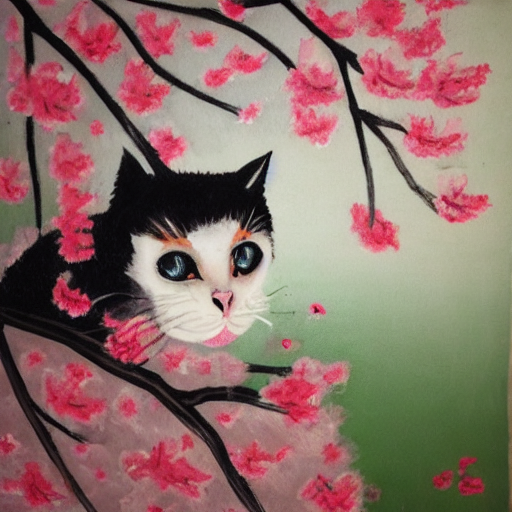

In [2]:
from diffusers import AutoPipelineForText2Image

pipeline = AutoPipelineForText2Image.from_pretrained("runwayml/stable-diffusion-v1-5").to("cuda")
image = pipeline("cat and cherry blossom", num_inference_steps=25).images[0]
image